In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot,plot 
import seaborn as sns
import plotly.graph_objects as go
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import geopandas as gpd
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('Data.csv')
df.sort_values('Location').head()

,Location,Social Category,PrimaryGirls,PrimaryBoys,PrimaryOverall,UpperGirls,UpperBoys,UpperOverall,SecondGirls,SecondBoys,SecondOverall
0,AHMEDABAD,General,0.00,0.00,0.00,0.00,0.00,0.00,8.02,12.34,10.54
633,AHMEDABAD,OBC,18.12,18.26,18.19,26.75,19.81,22.98,35.95,39.83,38.35
632,AHMEDABAD,General,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.50,0.42
764,AHMEDABAD,General,9.23,12.54,11.02,12.00,12.73,12.40,12.77,21.93,18.05
765,AHMEDABAD,OBC,0.00,0.00,0.00,0.43,0.00,0.00,16.72,24.65,21.60


In [3]:
cf.go_offline()

In [4]:
def district(String):
    x = dict(df[ df['Location'] == String].sum())
    x['Location'] = String
    del x['Social Category']
    return x

In [5]:
City = ['AHMEDABAD', 'AMRELI', 'ANAND', 'ARAVALLI', 'BANAS KANTHA',
       'BHARUCH', 'BHAVNAGAR', 'BOTAD', 'CHHOTAUDEPUR',
       'DEVBHOOMI DWARKA', 'DOHAD', 'GANDHINAGAR', 'GIR SOMNATH',
       'JAMNAGAR', 'JUNAGADH', 'KACHCHH', 'KHEDA', 'MAHESANA',
       'MAHISAGAR', 'MORBI', 'NARMADA', 'NAVSARI', 'PANCH MAHALS',
       'PATAN', 'PORBANDAR', 'RAJKOT', 'SABAR KANTHA', 'SURAT',
       'SURENDRANAGAR', 'TAPI', 'THE DANGS', 'VADODARA', 'VALSAD']
Data = list(map(district ,City ))

In [6]:
district = pd.DataFrame(Data)
district.head()

,Location,PrimaryGirls,PrimaryBoys,PrimaryOverall,UpperGirls,UpperBoys,UpperOverall,SecondGirls,SecondBoys,SecondOverall
0,AHMEDABAD,181.70,167.41,173.83,338.26,247.87,284.97,643.69,749.86,704.60
1,AMRELI,152.21,118.66,127.06,286.91,217.21,243.85,842.12,926.20,883.93
2,ANAND,88.29,93.83,90.73,201.22,132.13,161.20,721.03,849.65,790.96
3,ARAVALLI,40.41,27.60,32.32,106.09,57.19,78.78,456.92,530.94,498.77
4,BANAS KANTHA,87.97,80.67,83.21,480.29,287.10,374.62,866.93,890.46,878.70


In [7]:
temp = district['PrimaryBoys'] + district['PrimaryGirls'] + district['SecondGirls'] + district['SecondBoys'] + district['UpperBoys'] + district['UpperGirls']

In [8]:
district['Overall'] = temp

In [9]:
district = district['Overall']

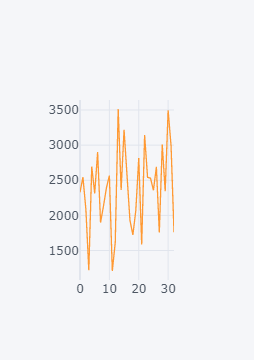

In [10]:
district.iplot(kind='line')

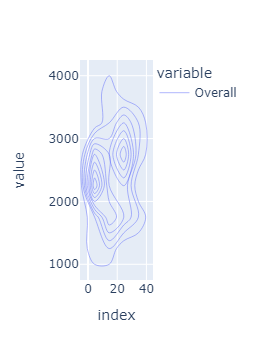

In [11]:
# Index 0 -32 denoted the District 
fig = px.density_contour(district)
fig.show()

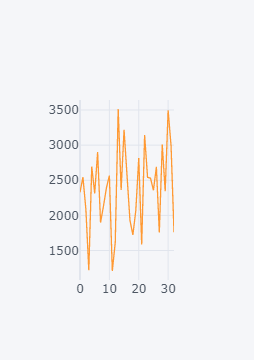

In [12]:
district.iplot()

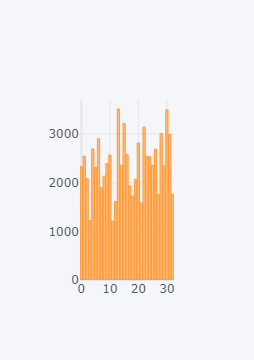

In [13]:
district.iplot(kind= 'bar')

In [14]:
geo_data =gpd.read_file('2011_Dist.json')
type(geo_data)

geopandas.geodataframe.GeoDataFrame

In [15]:
geo_data['random'] = temp

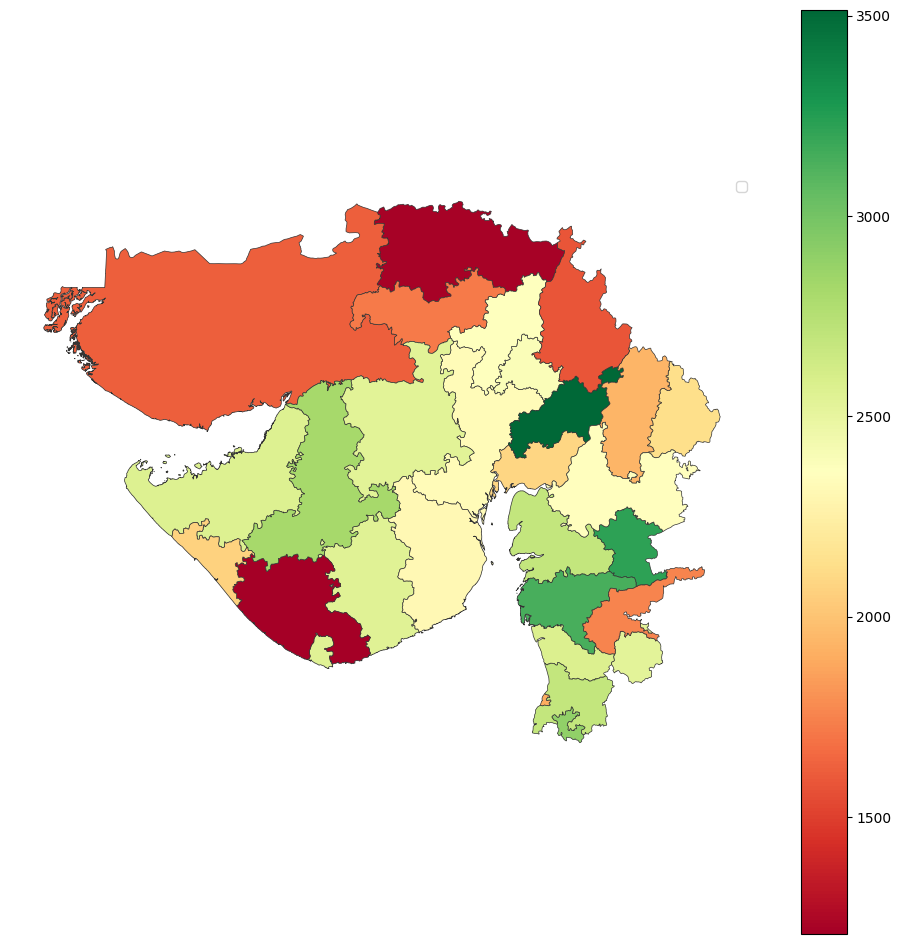

In [16]:
# graph color depends on the columns on the DataFrame Columns 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
fig = geo_data.plot(column='random', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True )
plt.legend(City)
plt.show()